In [1]:
pip install requests tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Data Loading

In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

In [11]:
import zipfile

with zipfile.ZipFile("skin-cancer-mnist-ham10000.zip", "r") as zip_ref:
    zip_ref.extractall("skin_cancer_dataset")

FileNotFoundError: [Errno 2] No such file or directory: 'skin-cancer-mnist-ham10000.zip'

In [ ]:
import os

# Create a new directory for merged images
merged_folder = '/content/skin_cancer_images'
os.makedirs(merged_folder, exist_ok=True)

In [ ]:
import shutil

# Define source paths (adjust based on where Part 1 and Part 2 are located)
part1_path = '/content/HAM10000_images_part_1'
part2_path = '/content/HAM10000_images_part_2'

# Copy files from Part 1 to the merged folder
for file_name in os.listdir(part1_path):
    full_file_name = os.path.join(part1_path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, merged_folder)

# Copy files from Part 2 to the merged folder
for file_name in os.listdir(part2_path):
    full_file_name = os.path.join(part2_path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, merged_folder)

print("Images have been merged successfully!")

Images have been merged successfully!


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'HAM10000_metadata.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


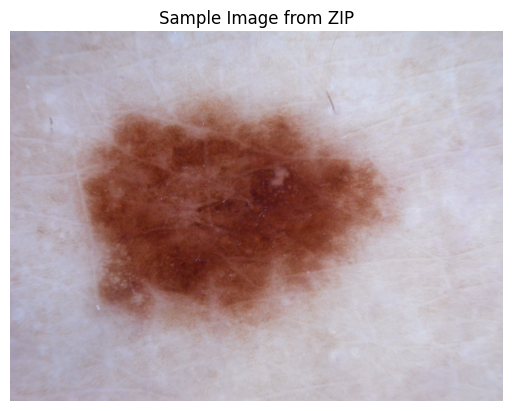

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = os.path.join(merged_folder, os.listdir(merged_folder)[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.title("Sample Image from ZIP")
plt.show()


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# Paths
input_dir = '/content/skin_cancer_images'       # Folder containing raw images
output_dir = '/content/processed_images'        # Folder to save .npy files
img_size = (224, 224)                           # Resize images to this dimension

os.makedirs(output_dir, exist_ok=True)


# Data PreProcessing

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Confirm missing values are removed
print("After dropping NA values:")
print(df.isnull().sum())


After dropping NA values:
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


In [ ]:
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of actual categorical columns to encode
categorical_cols = [
     'dx', 'dx_type', 'sex', 'localization'
]

label_encoders = {}
dff = df.copy()
# Encode each categorical column
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        dff[col] = le.fit_transform(df[col].astype(str))  # convert to string to avoid errors with NaNs
        label_encoders[col] = le

# Display the first few rows of encoded columns
print(dff[categorical_cols].head())


   dx  dx_type  sex  localization
0   2        3    1            11
1   2        3    1            11
2   2        3    1            11
3   2        3    1            11
4   2        3    1             4


In [ ]:
import pickle

# Save to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [ ]:
print("✅ Final preprocessed dataset:")
print(dff.head())
print("\n📐 Shape of dataset:", df.shape)

✅ Final preprocessed dataset:
     lesion_id      image_id  dx  dx_type   age  sex  localization
0  HAM_0000118  ISIC_0027419   2        3  80.0    1            11
1  HAM_0000118  ISIC_0025030   2        3  80.0    1            11
2  HAM_0002730  ISIC_0026769   2        3  80.0    1            11
3  HAM_0002730  ISIC_0025661   2        3  80.0    1            11
4  HAM_0001466  ISIC_0031633   2        3  75.0    1             4

📐 Shape of dataset: (9958, 7)


In [ ]:
import os
import numpy as np
from PIL import Image

# Specify the folder containing images
image_folder = '/content/skin_cancer_images'       # Folder containing raw images
output_folder = '/content/processed_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each file in the image folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)

    # Skip non-image files (optional)
    if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        continue

    try:
        # Open the image
        img = Image.open(image_path)

        # Convert image to numpy array (you can resize or preprocess if needed)
        img_array = np.array(img)

        # Define the output .npy file path
        output_file_path = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}.npy")

        # Save the numpy array to .npy format
        np.save(output_file_path, img_array)

        print(f"✅ Converted {image_name} to .npy")

    except Exception as e:
        print(f"❌ Failed to convert {image_name}: {e}")


Streaming output truncated to the last 5000 lines.
✅ Converted ISIC_0027388.jpg to .npy
✅ Converted ISIC_0029495.jpg to .npy
✅ Converted ISIC_0032928.jpg to .npy
✅ Converted ISIC_0024444.jpg to .npy
✅ Converted ISIC_0029032.jpg to .npy
✅ Converted ISIC_0024552.jpg to .npy
✅ Converted ISIC_0031848.jpg to .npy
✅ Converted ISIC_0029526.jpg to .npy
✅ Converted ISIC_0033444.jpg to .npy
✅ Converted ISIC_0029884.jpg to .npy
✅ Converted ISIC_0027501.jpg to .npy
✅ Converted ISIC_0033405.jpg to .npy
✅ Converted ISIC_0028663.jpg to .npy
✅ Converted ISIC_0032539.jpg to .npy
✅ Converted ISIC_0034267.jpg to .npy
✅ Converted ISIC_0034082.jpg to .npy
✅ Converted ISIC_0026954.jpg to .npy
✅ Converted ISIC_0026083.jpg to .npy
✅ Converted ISIC_0027834.jpg to .npy
✅ Converted ISIC_0027960.jpg to .npy
✅ Converted ISIC_0028940.jpg to .npy
✅ Converted ISIC_0027454.jpg to .npy
✅ Converted ISIC_0025868.jpg to .npy
✅ Converted ISIC_0027580.jpg to .npy
✅ Converted ISIC_0024729.jpg to .npy
✅ Converted ISIC_0026814

In [ ]:
# def preprocess_image(image_path):
#     try:
#         # Read and resize image
#         img = cv2.imread(image_path)
#         img = cv2.resize(img, img_size)

#         # Denoise
#         img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

#         # Convert to YUV and apply CLAHE to the Y channel
#         yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
#         y_channel = yuv[:, :, 0]

#         clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#         y_channel_clahe = clahe.apply(y_channel)

#         yuv[:, :, 0] = y_channel_clahe
#         img = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

#         # Normalize to [0, 1]
#         img = img.astype(np.float32) / 255.0
#         return img

#     except Exception as e:
#         print(f"⚠️ Error processing {image_path}: {e}")
#         return None


In [ ]:
# count = 0
# for filename in tqdm(os.listdir(input_dir), desc="Preprocessing"):
#     if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
#         img_path = os.path.join(input_dir, filename)
#         processed = preprocess_image(img_path)

#         if processed is not None:
#             save_name = filename.rsplit('.', 1)[0] + '.npy'
#             np.save(os.path.join(output_dir, save_name), processed)
#             count += 1

# print(f"✅ Preprocessed and saved {count} images to: {output_dir}")


In [ ]:
# import matplotlib.pyplot as plt

# # Load one .npy image
# npy_file = os.path.join(output_dir, os.listdir(output_dir)[0])
# img = np.load(npy_file)

# plt.imshow(img)
# plt.axis('off')
# plt.title("Preprocessed Image")
# plt.show()


In [ ]:
# # Display 5 input and output images side-by-side
# sample_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]

# for filename in sample_files:
#     # Load original image
#     original_path = os.path.join(input_dir, filename)
#     original_image = cv2.cvtColor(cv2.imread(original_path), cv2.COLOR_BGR2RGB)

#     # Load processed image
#     processed_path = os.path.join(output_dir, filename.rsplit('.', 1)[0] + '.npy')
#     processed_image = np.load(processed_path)

#     # Display side-by-side
#     plt.figure(figsize=(8, 4))

#     plt.subplot(1, 2, 1)
#     plt.imshow(original_image)
#     plt.title("Original")
#     plt.axis('off')

#     plt.subplot(1, 2, 2)
#     plt.imshow(processed_image)
#     plt.title("Processed")
#     plt.axis('off')

#     plt.suptitle(f"ISIC ID: {filename.rsplit('.', 1)[0]}")
#     plt.show()

# Data Combining

In [ ]:
import os
import numpy as np
import pandas as pd  # If needed to load your metadata file


# Example loading metadata into DataFrame
# dff = pd.read_csv("your_metadata_file.csv")  # Adjust to your actual metadata file format

# Prepare data list
data = []

for index, row in dff.iterrows():
    image_id = row['image_id']
    image_path = os.path.join(output_dir, f"{image_id}.npy")

    if os.path.exists(image_path):
        image = np.load(image_path)

        # Pack everything together, including lesion_id
        data.append({
            'image_id': image_id,
            'image': image,
            'age': row['age'],
            'localization': row['localization'],
            'sex': row['sex'],
            'dx': row['dx'],               # Target variable (diagnosis)
            'dx_type': row['dx_type'],     # Type of diagnostic confirmation
            'lesion_id': row['lesion_id']  # Lesion ID
        })
    else:
        print(f"❌ Image not found for {image_id}")

print(f"✅ Successfully paired {len(data)} images with metadata.")


✅ Successfully paired 9958 images with metadata.



Sample data preview:

🖼️ Image 1 - ID: ISIC_0027419
  Age: 80.0
  Sex: 1
  Localization: 11
  Diagnosis: 2 (3)
  Lesion ID: HAM_0000118


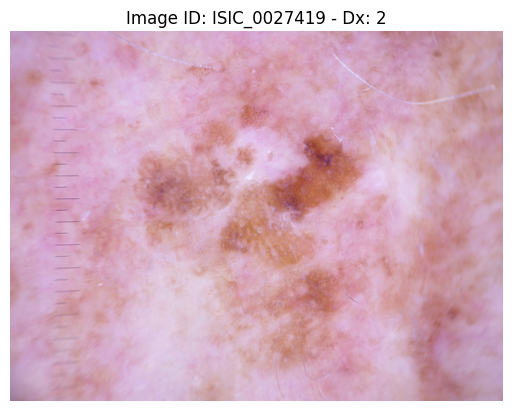


🖼️ Image 2 - ID: ISIC_0025030
  Age: 80.0
  Sex: 1
  Localization: 11
  Diagnosis: 2 (3)
  Lesion ID: HAM_0000118


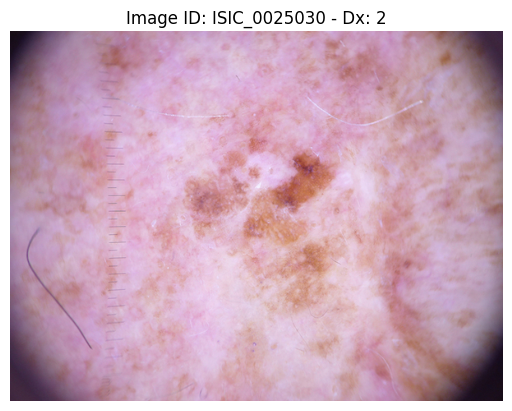


🖼️ Image 3 - ID: ISIC_0026769
  Age: 80.0
  Sex: 1
  Localization: 11
  Diagnosis: 2 (3)
  Lesion ID: HAM_0002730


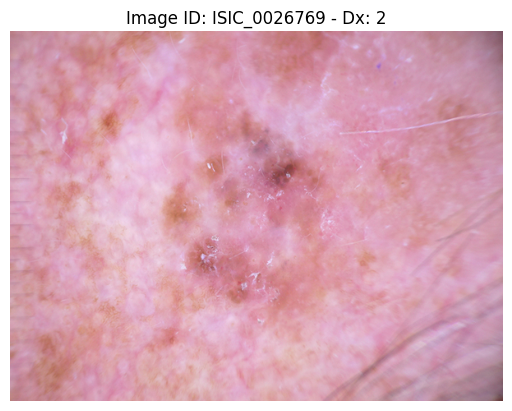

In [ ]:
import matplotlib.pyplot as plt

print("\nSample data preview:")
for i, entry in enumerate(data[:3]):
    print(f"\n🖼️ Image {i+1} - ID: {entry['image_id']}")
    print(f"  Age: {entry['age']}")
    print(f"  Sex: {entry['sex']}")
    print(f"  Localization: {entry['localization']}")
    print(f"  Diagnosis: {entry['dx']} ({entry['dx_type']})")
    print(f"  Lesion ID: {entry['lesion_id']}")

    # Check if the image is grayscale and display accordingly
    if len(entry['image'].shape) == 2:  # Grayscale image (2D array)
        plt.imshow(entry['image'], cmap='gray')
    else:  # Color image (3D array)
        plt.imshow(entry['image'])

    plt.title(f"Image ID: {entry['image_id']} - Dx: {entry['dx']}")
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()


In [ ]:
import joblib

# Save the data list to disk
joblib.dump(data, 'data_backup.joblib')

print("✅ Data saved successfully!")

✅ Data saved successfully!


# Data Visulization

In [ ]:
!pip install matplotlib seaborn pandas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming you already have it as `dff`)
# dff = pd.read_csv("your_metadata_file.csv")

# Set seaborn theme for cleaner plots
sns.set(style="whitegrid")

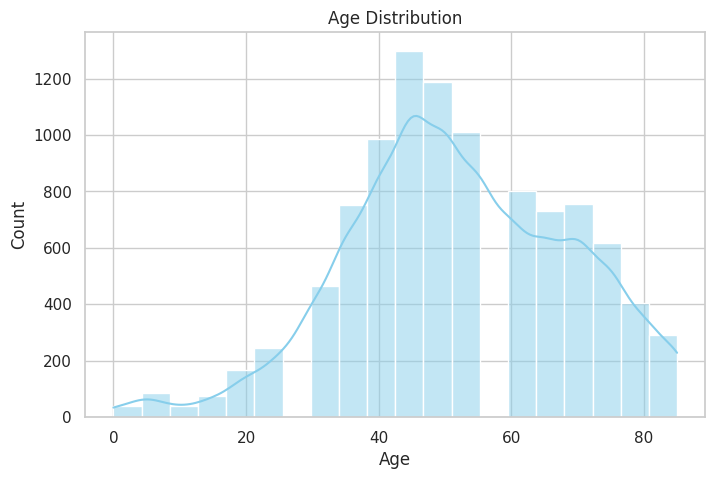

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dff['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-28-fcb4ce3730be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dff, x='sex', palette='pastel')


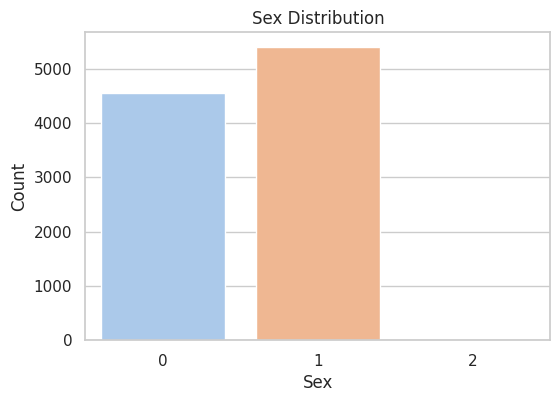

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dff, x='sex', palette='pastel')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<ipython-input-29-db2234db3cae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dff, x='dx', order=dff['dx'].value_counts().index, palette='viridis')


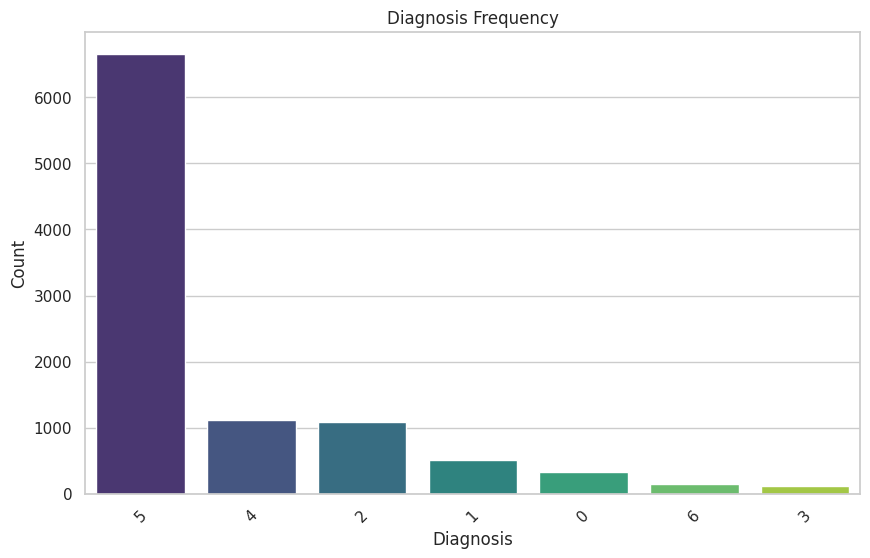

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dff, x='dx', order=dff['dx'].value_counts().index, palette='viridis')
plt.title('Diagnosis Frequency')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-89821a456932>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dff, x='localization', order=dff['localization'].value_counts().index, palette='Set3')


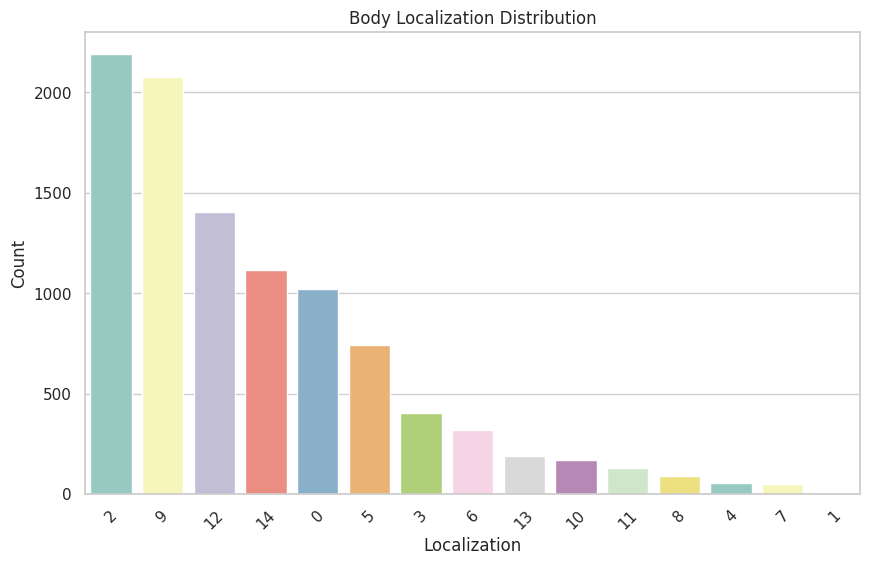

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dff, x='localization', order=dff['localization'].value_counts().index, palette='Set3')
plt.title('Body Localization Distribution')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-b741d0001040>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dff, x='dx', y='age', palette='coolwarm')


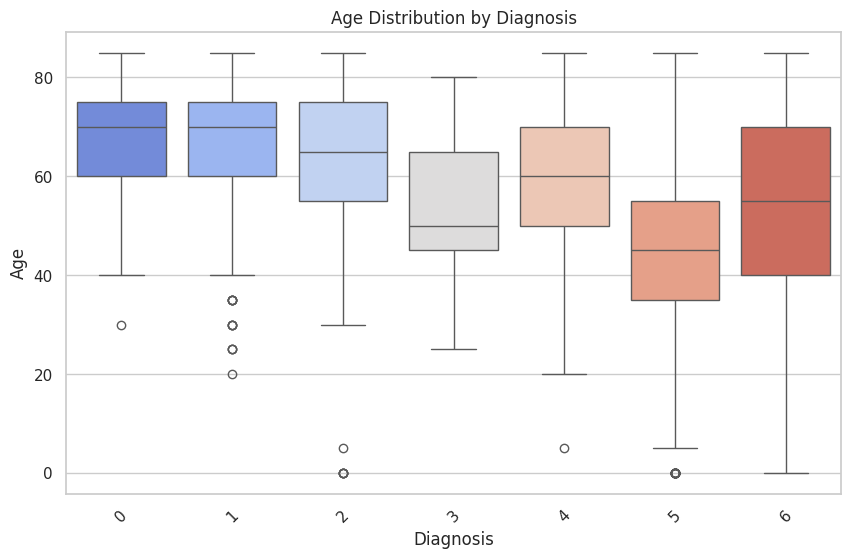

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dff, x='dx', y='age', palette='coolwarm')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

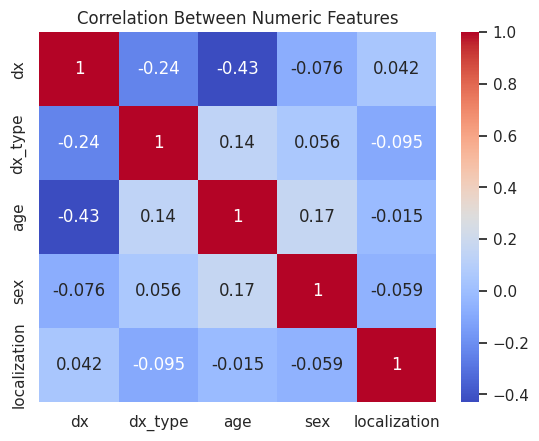

In [ ]:
# Select only numeric columns
numeric_dff = dff.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
sns.heatmap(numeric_dff.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


In [ ]:
class_counts = dff['dx'].value_counts()

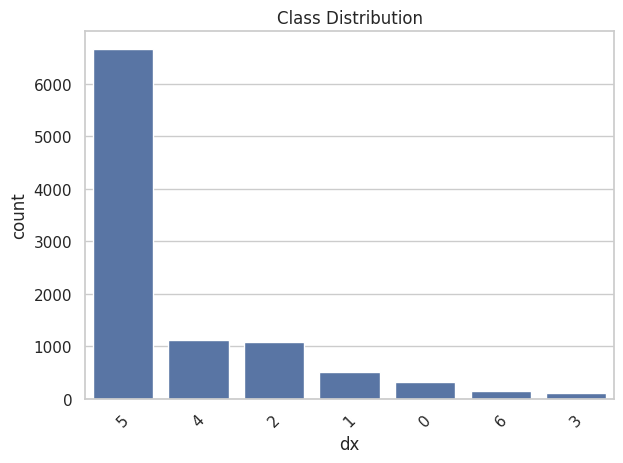

In [ ]:
sns.countplot(data=dff, x='dx', order=class_counts.index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")

Imbalance ratio (max/min): 57.91


# Data Augmentation

In [ ]:
import os
import numpy as np
import pandas as pd
import albumentations as A
from collections import Counter
from tqdm import tqdm

# Define the augmentation pipeline
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.5)
])

# Count diagnosis classes
class_counts = Counter(dff['dx'])
max_class_count = max(class_counts.values())

print("📊 Original class distribution:")
print(class_counts)

# Create output directory
augmented_image_dir = 'augmented_images'
os.makedirs(augmented_image_dir, exist_ok=True)

# For merging all metadata
all_metadata_dfs = []

# Loop through each class
for dx_class, count in class_counts.items():
    class_data = dff[dff['dx'] == dx_class]
    needed = max_class_count - count

    print(f"\n🧪 Augmenting {dx_class}: Need {needed} more samples")
    if needed <= 0:
        continue

    metadata_records = []

    for i in tqdm(range(needed)):
        row = class_data.sample(1).iloc[0]
        image_path = os.path.join(output_dir, f"{row['image_id']}.npy")

        if not os.path.exists(image_path):
            continue

        image = np.load(image_path)
        if image.ndim == 2:
            image = np.expand_dims(image, axis=2)

        augmented = augment(image=image)['image']
        augmented = np.squeeze(augmented)

        aug_id = f"aug_{row['image_id']}_{i}"
        save_path = os.path.join(augmented_image_dir, f"{aug_id}.npy")
        np.save(save_path, augmented)

        metadata_records.append({
            'image_id': aug_id,
            'age': row['age'],
            'localization': row['localization'],
            'sex': row['sex'],
            'dx': row['dx'],
            'dx_type': row['dx_type'],
            'lesion_id': row['lesion_id']
        })

        # Optional: clear large objects (minor gain)
        del image, augmented

    # Save per-class metadata CSV
    df_metadata = pd.DataFrame(metadata_records)
    class_csv_path = os.path.join(augmented_image_dir, f"augmented_metadata_{dx_class}.csv")
    df_metadata.to_csv(class_csv_path, index=False)
    all_metadata_dfs.append(df_metadata)

    # Clear to save memory
    del df_metadata, metadata_records, class_data

# Merge and save all metadata
merged_metadata = pd.concat(all_metadata_dfs, ignore_index=True)
merged_csv_path = os.path.join(augmented_image_dir, "augmented_metadata_all.csv")
merged_metadata.to_csv(merged_csv_path, index=False)

print("\n✅ Augmentation and cleanup complete.")
print(f"📁 Images saved in: {augmented_image_dir}")
print(f"🗂️ Final metadata: {merged_csv_path}")


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:111: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


📊 Original class distribution:
Counter({5: 6660, 4: 1111, 2: 1089, 1: 514, 0: 327, 6: 142, 3: 115})

🧪 Augmenting 2: Need 5571 more samples


100%|██████████| 5571/5571 [02:31<00:00, 36.82it/s]



🧪 Augmenting 5: Need 0 more samples

🧪 Augmenting 3: Need 6545 more samples


100%|██████████| 6545/6545 [03:44<00:00, 29.13it/s]



🧪 Augmenting 4: Need 5549 more samples


100%|██████████| 5549/5549 [03:18<00:00, 27.95it/s]



🧪 Augmenting 6: Need 6518 more samples


100%|██████████| 6518/6518 [03:57<00:00, 27.45it/s]



🧪 Augmenting 1: Need 6146 more samples


100%|██████████| 6146/6146 [03:37<00:00, 28.24it/s]



🧪 Augmenting 0: Need 6333 more samples


100%|██████████| 6333/6333 [03:45<00:00, 28.15it/s]



✅ Augmentation and cleanup complete.
📁 Images saved in: augmented_images
🗂️ Final metadata: augmented_images/augmented_metadata_all.csv


In [ ]:
import shutil

# Example: delete 'augmented_images' folder
shutil.rmtree('HAM10000_images_part_1', ignore_errors=True)
shutil.rmtree('HAM10000_images_part_2', ignore_errors=True)
shutil.rmtree('ham10000_images_part_1', ignore_errors=True)
shutil.rmtree('ham10000_images_part_2', ignore_errors=True)

<ipython-input-27-9ed6e56d204c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_aug, x='dx', order=df_aug['dx'].value_counts().index, palette='Set2')


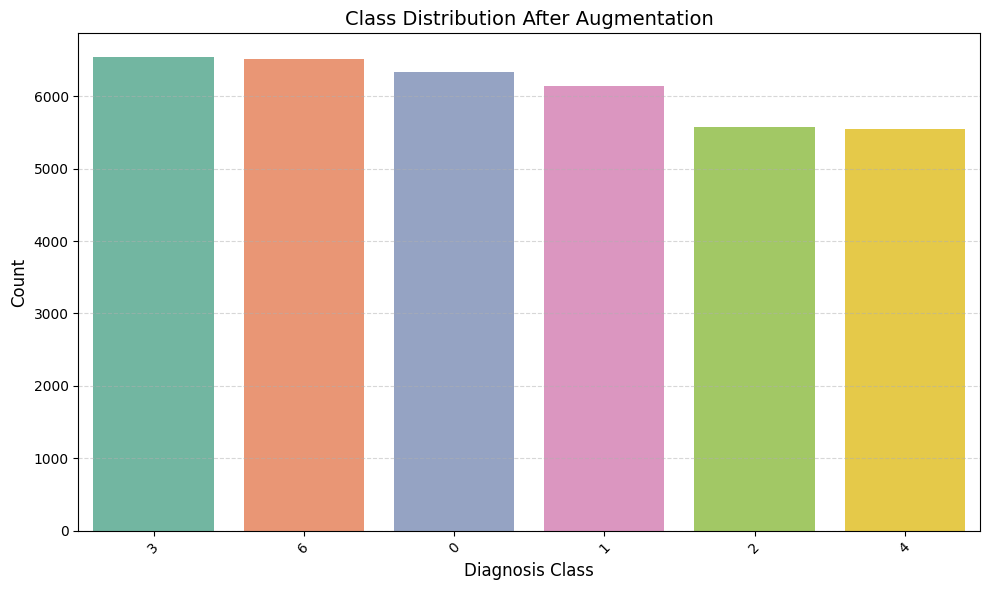

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged metadata CSV
merged_csv_path = 'augmented_images/augmented_metadata_all.csv'
df_aug = pd.read_csv(merged_csv_path)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_aug, x='dx', order=df_aug['dx'].value_counts().index, palette='Set2')

plt.title('Class Distribution After Augmentation', fontsize=14)
plt.xlabel('Diagnosis Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
class_counts = df_aug['dx'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")

Imbalance ratio (max/min): 1.18


In [ ]:
del df
del dff

# Feature Selection

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('augmented_images/augmented_metadata_all.csv')
print(df.head())
print(df.info())


             image_id   age  localization  sex  dx  dx_type    lesion_id
0  aug_ISIC_0026446_0  75.0             9    0   2        1  HAM_0002965
1  aug_ISIC_0032929_1  75.0             5    0   2        3  HAM_0003321
2  aug_ISIC_0031619_2  65.0             5    1   2        1  HAM_0005626
3  aug_ISIC_0034291_3  70.0             2    0   2        1  HAM_0006528
4  aug_ISIC_0032978_4  70.0             3    1   2        3  HAM_0000779
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      36662 non-null  object 
 1   age           36662 non-null  float64
 2   localization  36662 non-null  int64  
 3   sex           36662 non-null  int64  
 4   dx            36662 non-null  int64  
 5   dx_type       36662 non-null  int64  
 6   lesion_id     36662 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0+ MB
None


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
data = df.copy()

# Encode categorical features
categorical_cols = ['sex', 'localization', 'dx_type']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Drop columns not used as features
data.drop(columns=['image_id', 'lesion_id'], inplace=True)

# Separate features and target
X = data.drop('dx', axis=1)
y = LabelEncoder().fit_transform(data['dx'])  # Encode target


<ipython-input-43-81415b5f6147>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")


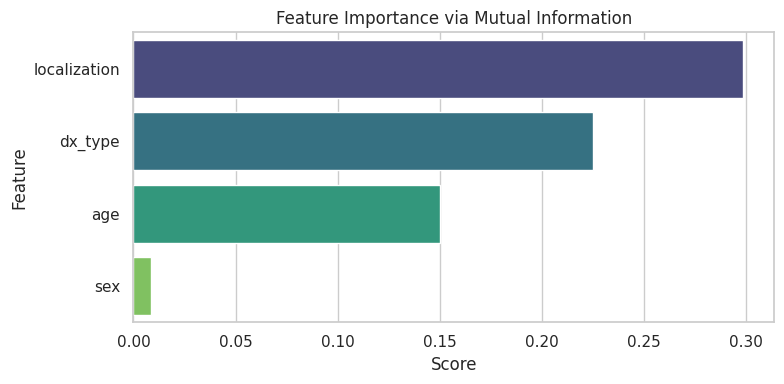

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a Series for visualization
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Feature Importance via Mutual Information")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
top_features = mi_series.head(6).index.tolist()
print("Selected Features:", top_features)

Selected Features: ['localization', 'dx_type', 'age', 'sex']


# Model Training

In [ ]:
pip install torch

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# === Dataset for .npy images ===
class NPYImageDataset(Dataset):
    def __init__(self, dataframe, image_dir):
        self.df = dataframe
        self.image_dir = image_dir

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = os.path.join(self.image_dir, f"{row['image_id']}.npy")
        image = np.load(image_path)

        # Ensure image has 3 channels (RGB)
        if image.ndim == 2:
            image = np.expand_dims(image, axis=0)  # Grayscale to single channel
        elif image.shape[2] == 1:  # If it's a single channel image
            image = np.repeat(image, 3, axis=2)  # Convert to 3 channels
        elif image.shape[2] == 3:
            image = np.transpose(image, (2, 0, 1))  # Make sure it's [C, H, W]

        image = image.astype(np.float32) / 255.0
        return torch.tensor(image), torch.tensor(row['dx']).long()

# === Simple CNN Model for RGB images ===
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        # Updated to expect 3 channels (RGB)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Expecting 3 channels (RGB)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2)

        # Calculate the size of the output after convolution and pooling
        self.fc1 = nn.Linear(64 * 112 * 150, 128)  # 450/2 = 225, 600/2 = 300, then after conv pool

        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [B, 32, 450/2, 600/2] -> [B, 32, 225, 300]
        x = self.pool(F.relu(self.conv2(x)))  # [B, 64, 225/2, 300/2] -> [B, 64, 112, 150]
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layers
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# === Prepare Data ===
df = pd.read_csv("augmented_images/augmented_metadata_all.csv")
df['dx'] = df['dx'].replace({6: 5})  # Replace 6 with 5
num_classes = df['dx'].nunique()

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['dx'], random_state=42)

train_dataset = NPYImageDataset(train_df, 'augmented_images')
val_dataset = NPYImageDataset(val_df, 'augmented_images')

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# === Training Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# === Training Loop ===
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # === Validation Accuracy ===
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = correct / total * 100

    print(f"✅ Epoch {epoch+1} | Loss: {total_loss:.4f} | Val Acc: {acc:.2f}%")

# === Save Model ===
torch.save(model.state_dict(), "cnn_model.pth")
print("💾 Model saved as cnn_model.pth")


Epoch 1/10: 100%|██████████| 917/917 [09:50<00:00,  1.55it/s]


✅ Epoch 1 | Loss: 1258.1076 | Val Acc: 54.21%


Epoch 2/10: 100%|██████████| 917/917 [09:47<00:00,  1.56it/s]


✅ Epoch 2 | Loss: 900.7847 | Val Acc: 62.68%


Epoch 3/10: 100%|██████████| 917/917 [10:03<00:00,  1.52it/s]


✅ Epoch 3 | Loss: 690.4156 | Val Acc: 65.16%


Epoch 4/10: 100%|██████████| 917/917 [10:05<00:00,  1.51it/s]


✅ Epoch 4 | Loss: 481.8787 | Val Acc: 66.06%


Epoch 5/10: 100%|██████████| 917/917 [10:03<00:00,  1.52it/s]


✅ Epoch 5 | Loss: 288.3428 | Val Acc: 66.48%


Epoch 6/10: 100%|██████████| 917/917 [10:00<00:00,  1.53it/s]


✅ Epoch 6 | Loss: 185.8780 | Val Acc: 67.52%


Epoch 7/10: 100%|██████████| 917/917 [09:59<00:00,  1.53it/s]


✅ Epoch 7 | Loss: 134.4607 | Val Acc: 66.92%


Epoch 8/10: 100%|██████████| 917/917 [10:00<00:00,  1.53it/s]


✅ Epoch 8 | Loss: 85.7001 | Val Acc: 66.51%


Epoch 9/10: 100%|██████████| 917/917 [10:00<00:00,  1.53it/s]


✅ Epoch 9 | Loss: 86.7616 | Val Acc: 65.25%


Epoch 10/10: 100%|██████████| 917/917 [10:14<00:00,  1.49it/s]


✅ Epoch 10 | Loss: 60.1568 | Val Acc: 67.50%
💾 Model saved as cnn_model.pth


# Saving Model

In [ ]:
torch.save(model, "cnn_full_model.pth")
print("💾 Full model saved as cnn_full_model.pth")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Precision: 0.68, Recall: 0.68, F1-Score: 0.68


# Interface

In [ ]:
import numpy as np
from PIL import Image
import os

def convert_image_to_npy(image_path, output_path, resize_shape=(450, 336)):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.resize(resize_shape)  # Resize to match training input
    image_array = np.array(image, dtype=np.uint8)




In [ ]:
with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

In [ ]:
label_encoder = label_encoders['dx']
label_classes = label_encoder.inverse_transform(np.arange(len(label_encoder.classes_)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# === Model Definition (same as training) ===
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 112 * 150, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# === Load Model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 6  # Or set dynamically if needed
model = SimpleCNN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("cnn_model.pth", map_location=device))
model.eval()

# === Predict Function ===
def predict_npy_image(npy_path):
    image = np.load(npy_path)

    # Ensure it has 3 channels
    if image.ndim == 2:
        image = np.expand_dims(image, axis=0)
        image = np.repeat(image, 3, axis=0)
    elif image.shape[2] == 1:
        image = np.repeat(image, 3, axis=2)
        image = np.transpose(image, (2, 0, 1))  # [H, W, C] → [C, H, W]
    elif image.shape[2] == 3:
        image = np.transpose(image, (2, 0, 1))  # [H, W, C] → [C, H, W]

    # Normalize and convert to tensor
    image = image.astype(np.float32) / 255.0
    image_tensor = torch.tensor(image).unsqueeze(0).to(device)  # Shape: [1, 3, 450, 600]

    with torch.no_grad():
        output = model(image_tensor)
        pred = torch.argmax(output, dim=1).item()

    return pred  # You can map this integer to a label if needed

# === Usage Example ===
if __name__ == "__main__":
    path = "augmented_images/aug_ISIC_0024310_3781.npy"  # Replace with actual .npy path
    prediction = predict_npy_image(path)
    print(f"🧠 Predicted class index: {prediction}")


🧠 Predicted class index: 4


In [ ]:
import pickle

# Load label encoders
with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# Get the encoder for 'dx'
dx_encoder = label_encoders['dx']

predicted_label = dx_encoder.inverse_transform([prediction])[0]

print(f"🧠 Predicted class index: {prediction}")
print(f"✅ Original diagnosis label: {predicted_label}")


🧠 Predicted class index: 4
✅ Original diagnosis label: mel
